# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Balejado, Venser\
_Student No._: 2022-13875\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: October 19, 2024 - 03:00 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: VENSER HALILI BALEJADO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


The plot below shows a peak of the magnitude of amplitude at 10 (frequency bin) showing an incorrect plot of the amplitudes.
This may first be associated to nyquist frequency where going down below the minimum sampling frequency will give an aliasing of data.
However, we were simply just taking coefficients of half of the sine wave function as the problem asked to take the coefficients from 1000 evenly
spaced sample points, but have not specifically gave a range, so this does not mean we should only have a range from 0 to 1000 with 1000 evenly
spaced points that gives us half the sine wave function. We can also take the coefficients from 0 to 2000 with 1000 evenly spaced points 
sampling in an increments of 2, giving us the true plot of the given sine wave function showing 2 peaks at the second figure. 




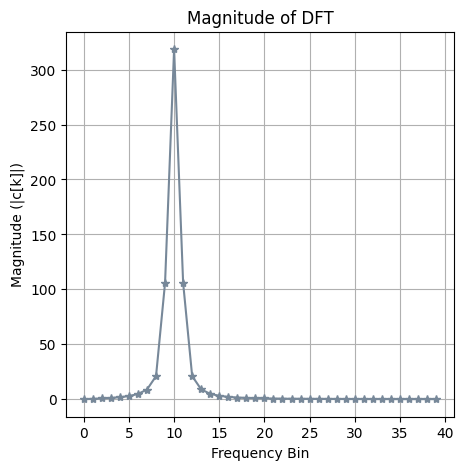

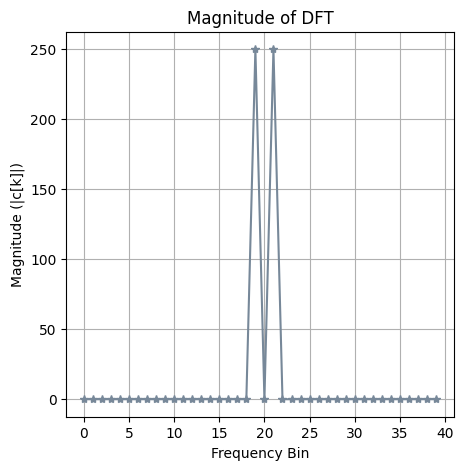


Below is an example of a modulated sine wave showing that as our sample points goes closer to the nyquist frequency,
the frequncy will be lower but will still atain the representation of the sine wave function, however if we go below the nyquist 
frequency, data will be aliased and will cause distortion of our sampling data. Below are three modulated sine wave with 1000 sample points
which is the given, 41 sample points which gives a lower frequency and is the lowest within the nyquist frequency, and 40 sample points which
is below the nyquist frequency respectively.



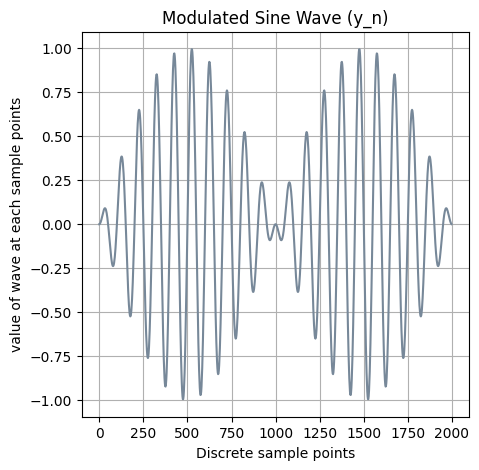

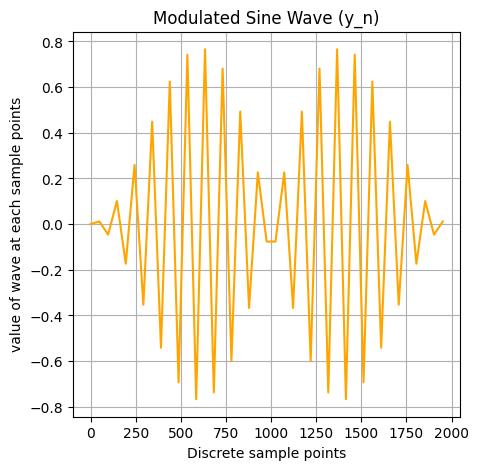

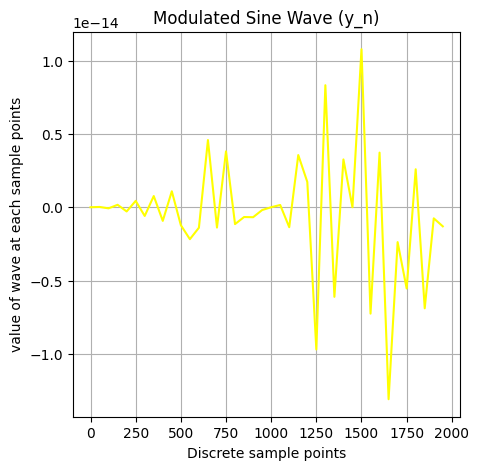

In [23]:
import numpy as np                # for arrays and mathematical functions (zeros, empty, linspace)
import matplotlib.pyplot as plt   # for plotting data
from math import sin, pi          # for importing sin and pi function
from cmath import exp             # for importing exponential function

# Defining the Modulated Sine Wave (MSW) Function
def MSW(n, N):
  return sin(pi*n/N)*sin(20*pi*n/N) # This function shows the product of two sine functions
  # sin(pi*n/N) : controls the envelopes of the wave and creates different amplitudes
  # sin(20*pi*n/N): modulates the frequency of the wave giving higher frequency oscillations
  # N = number of evenly spaced points
  # n = value at which the wave is evaluated

# Defining the function that will calculate the Fourier coefficients (Discrete Fourier Transform)
def dft(y):
# where y is an array containing the value of the wave at the sample points
    N = len(y)                                # Takes an array that contains the values of the wave at the sample points.
    c = np.zeros(N//2+1, dtype = complex)     # Creates an array to store the coefficients that are complex.
    for k in range(N//2+1):                   # -- Takes each frequency k and making ang sum of these contributions from
        for n in range(N):                    # the sample points n in this line using the exp function
            c[k] += y[n]*exp(-2j*pi*k*n/N)    # summing the contributions from each frequency k to sample points n
    return c                                  # to form the fourier coefficients. --

N = 1000                                      # number of evenly spaced sample points
N_1 = 41                                      # to show the least number of evenly spaced sample points that will give the correct representation of sine wave
N_2 = 40                                      # to show that going below the nyquist frequency will give a false representation of the sine wave function

# Setup for the coefficients of half the wave function
y_1 =  [MSW(n, N) for n in range(0, N, 1)]     # This is the range I come up with after reading the question for the first time
                                               # This is from 0 to 1000 with increments of 1 giving 1000 equally spaced points
c_1 =  dft(y_1)                                # calling the first range to the dft and assigning it as c_1

# Setup for the coefficients of the full wave function
y_2 =  [MSW(n, N) for n in range (0, 2*N, 2)]  # This is the range to be able to take all the coefficients of the wave funtion
                                               # This is from 0 to 2000 with increments of 2 giving 1000 equally spaced points
c_2 = dft(y_2)                                 # calling the second range to the dft and assigning it as c_2

# Discrete sample points
x_i = 0    # started value of the discrete sample points
x_f = N*2  # end value of the discrete sample points

x_n = np.linspace (x_i, x_f, N, endpoint = False) # This is used to create an array of evenly spaced values
                                                  # from 0 to 2000 with 1000 evenly spaced sample points
                                                  # the enpoint is assigned as false to ensure that x_f is not included in the array
x_n1 = np.linspace(x_i, x_f, N_1, endpoint = False) # from 0 to 2000 with 41 evenly spaced sample points
x_n2 = np.linspace(x_i, x_f, N_2, endpoint = False) # from 0 to 2000 with 40 evenly spaced sample points

# Calculating the value of the wave at each sample point
y_n = np.empty(N)             # I create an array that is empty with size N
                              # this is where the values will be stored
for i in range(N):            # i loop to iterate over each index in range N
  y_n[i] = MSW(x_n[i], N)     # calling the MSW for each sample points from range N or (0 to 999)
                              # this is used in the envelope sine function

y_1n = np.empty(N_1)           # I create an array that is empty with size N_1
                               # this is where the values will be stored
for i in range(N_1):           # i loop to iterate over each index in range N_1
  y_1n[i] = MSW(x_n[i], N_1)   # calling the MSW for each sample points from range N_1 or (0 to 999)
                               # this is used to show the least evenly sample points we can provide to show the envelope sine function

y_2n = np.empty(N_2)           # I create an array that is empty with size N_2
                               # this is where the values will be stored
for i in range(N_2):           # i loop to iterate over each index in range N_2
  y_2n[i] = MSW(x_n[i], N_2)   # calling the MSW for each sample points from range N_2 or (0 to 999)
                               # this is used to show that going below the nyquist frequency will give the wrong envelope sine function
# Plotting and explanation
print('''The plot below shows a peak of the magnitude of amplitude at 10 (frequency bin) showing an incorrect plot of the amplitudes.
This may first be associated to nyquist frequency where going down below the minimum sampling frequency will give an aliasing of data.
However, we were simply just taking coefficients of half of the sine wave function as the problem asked to take the coefficients from 1000 evenly
spaced sample points, but have not specifically gave a range, so this does not mean we should only have a range from 0 to 1000 with 1000 evenly
spaced points that gives us half the sine wave function. We can also take the coefficients from 0 to 2000 with 1000 evenly spaced points
sampling in an increments of 2, giving us the true plot of the given sine wave function showing 2 peaks at the second figure.

''')
# plotting the magnitude of the DFT fir half the wave function
plt.figure(figsize=(5, 5))                                        # setting the size of the plot
plt.plot(abs(c_1)[0:40], color = 'lightslategrey', marker = '*')  # Plotting c_1 gives us the magnitude of DFT for half wave
plt.xlabel('Frequency Bin')                                       # x label of the plot
plt.ylabel('Magnitude (|c[k]|)')                                  # y label of the plot
plt.title('Magnitude of DFT')                                     # title of the plot
plt.grid()                                                        # used to include grids in the graph
plt.show()                                                        # shows the plot function

# plotting the magnitude of the DFT for full the wave function
plt.figure(figsize=(5, 5))                                        # setting the size of the plot
plt.plot(abs(c_2)[0:40], color = 'lightslategrey', marker = '*')  # Plotting c_2 that gives us the magnitude of DFT for full wave
plt.xlabel('Frequency Bin')                                       # x label of the plot
plt.ylabel('Magnitude (|c[k]|)')                                  # y label of the plot
plt.title('Magnitude of DFT')                                     # title of the plot
plt.grid()                                                        # used to include grids in the graph
plt.show()                                                        # shows the plot function
print('')

print('''Below is an example of a modulated sine wave showing that as our sample points goes closer to the nyquist frequency,
the frequncy will be lower but will still atain the representation of the sine wave function, however if we go below the nyquist
frequency, data will be aliased and will cause distortion of our sampling data. Below are three modulated sine wave with 1000 sample points
which is the given, 41 sample points which gives a lower frequency and is the lowest within the nyquist frequency, and 40 sample points which
is below the nyquist frequency respectively.''')

# plot of the amplitudes at each sample points
print('')
plt.figure(figsize=(5, 5))                                        # setting the size of the plot
plt.plot(x_n, y_n, color = 'lightslategrey')                      # plotting the discrete sample points vs. the value of wave at each sample points
plt.xlabel('Discrete sample points')                              # x label of the plot
plt.ylabel('value of wave at each sample points')                 # y label of the plot
plt.title('Modulated Sine Wave (y_n)')                            # title of the plot
plt.grid()                                                        # used to include grids in the graph
plt.show()                                                        # shows the plot function

plt.figure(figsize=(5, 5))                                        # setting the size of the plot
plt.plot(x_n1, y_1n, color ='orange')                             # plotting the discrete sample points vs. the value of wave at each sample points
plt.xlabel('Discrete sample points')                              # x label of the plot
plt.ylabel('value of wave at each sample points')                 # y label of the plot
plt.title('Modulated Sine Wave (y_n)')                            # title of the plot
plt.grid()                                                        # used to include grids in the graph
plt.show()                                                        # shows the plot function

plt.figure(figsize=(5, 5))                                        # setting the size of the plot
plt.plot(x_n2, y_2n, color = 'yellow')                            # plotting the discrete sample points vs. the value of wave at each sample points
plt.xlabel('Discrete sample points')                              # x label of the plot
plt.ylabel('value of wave at each sample points')                 # y label of the plot
plt.title('Modulated Sine Wave (y_n)')                            # title of the plot
plt.grid()                                                        # used to include grids in the graph
plt.show()                                                        # shows the plot function

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [25]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [26]:
!ls drive/My\ Drive/

 1.jpg	   'Colab Notebooks'	 'page 1.jpg'	   Receipts		'Untitled Files'
 2.jpg	   'ID form5'		 'page 2.jpg'	  'Reference Books'	'UPD files'
 3.jpg	   'NIP - Undergrad'	 'page 3.jpg'	  'Senior High School'	'UP Organizations'
 Apphy155  'Norwegian wood.pdf'  'Personal Dump'  'SPP format'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [27]:
file_path = "/content/drive/My Drive/Apphy155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [28]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [29]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

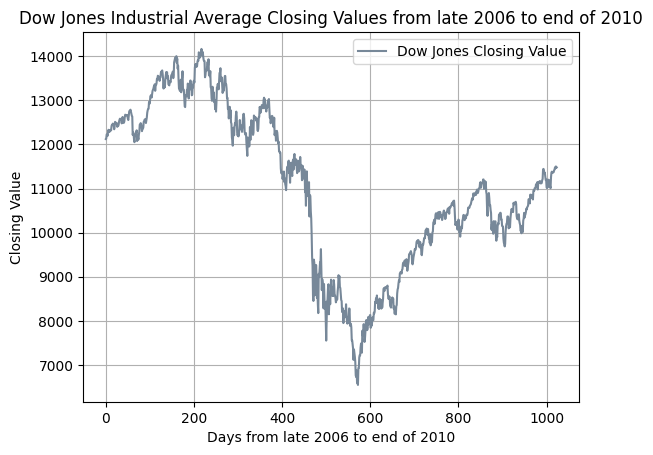

Where the number of elements (N) in the dow txt file is: 1024

Calculating the coefficients of the dow using rfft
Where the number of coefficients using the rfft is: 513



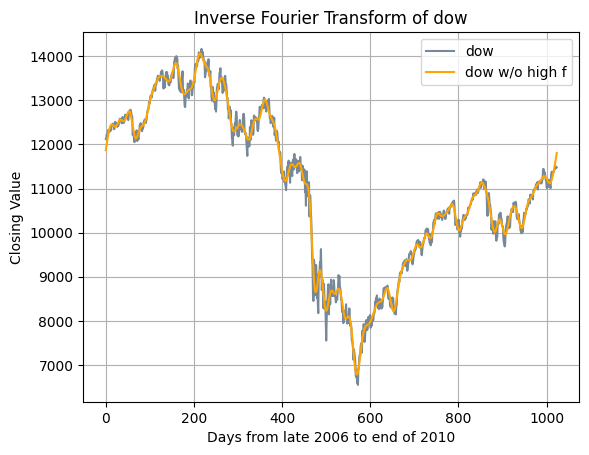

The plot above shows that the inverse fourier transform of the data with the removed higher frequencies 
shows almost the same as the original data with the DFT but with more smoother plot and less spikes. In this plot
we can see the nyquist frequency at play, where we remove the higher frequency datas so that if we take the irfft 
of dow the higher frequency datas wont fold back into lower frequencies that will result to aliasing and giving a 
different plot, that is why we set the last 90% of dow to zero to prevent aliasing when performing inverse fast 
fourier transfrom. Additionally, the rfft and the irfft shows the same frequency representation because the lower
frequencies represent the overall trend whereas the higher frequencies that was set to zero in the irfft represents the 
noise and fluctuations, resulting in the irfft being more smooth while preserving the overall trend.  



In [36]:
import matplotlib.pyplot as plt # for plotting the data from dow.txt
from numpy.fft import rfft      # for the fast fourier transform and inverse of fast fourier transform

# ----- Item 1. ----- #

# Plotting the data from dow on a graph
plt.plot(dow, label='Dow Jones Closing Value', color='lightslategrey')
# the line above plots the data from the dow.txt which si the closing value of for each business day from late 2006 to end of 2010
plt.xlabel('Days from late 2006 to end of 2010')           # sets the x label of the plot
plt.ylabel('Closing Value')  # sets the y label of the plot
plt.title('Dow Jones Industrial Average Closing Values from late 2006 to end of 2010')
plt.grid()    # creates a grid in the plot
plt.legend()  # function that shows the legend in the plot
plt.show()    # shows the plot
print ("Where the number of elements (N) in the dow txt file is:", len(dow)) # Number of elements in dow
print("") # for spacing

# ----- Item 2. ----- #
print("Calculating the coefficients of the dow using rfft")
# Calculatin the coefficients of the discrete fourier transform of the data
c_k = rfft(dow) # the rfft function computes the DFT of dow
                # returns coefficients that are complex representing the frequency component of the signal

# c_k must have N/2 + 1 complex elements
# print(c_k) - was used to check the coefficients computed

print("Where the number of coefficients using the rfft is:", c_k.size)
# the line above was used to check the size of the coefficient array, which will be N/2 + 1 for a real-valued input
print("")


# ----- Item 3. ----- #
# Setting the last 90% of the coefficients to zero
c_k[ int(c_k.size * 0.1) : ] = 0 + 0j
# We set the last 90% of the fourier coefficients to zero in order to smoothen out the data
# as we keep only the lower frequency components and we have succesfully removed the high frequency
# components of the signal.


# ----- Item 4. ----- #
# Calculating the inverse Fourier Transform of the resulting array
from numpy.fft import irfft # calls the Inverse FFT
# this transform the modified frequency domain representaion back into the time domain
# The result will be the smooth version of the original data
dow_new = irfft(c_k)

# Plotting the DFT from the original data of dow and the iFFT after setting the higher frequency datas to zero
plt.plot(dow, color = 'lightslategrey') # Plots the original data with the FFT
plt.plot(dow_new, color = 'orange') # Plots the now smoother data after the editing in coefficient and irfft
plt.xlabel('Days from late 2006 to end of 2010')           # sets the x label of the plot
plt.ylabel('Closing Value')  # sets the y label of the plot
plt.title('Inverse Fourier Transform of dow') # sets the title for the plot
plt.legend(['dow', 'dow w/o high f'])         # sets the legend for the plot
plt.grid() # creates a grid in the plot
plt.show() # calls the plot

# Observations
print('''The plot above shows that the inverse fourier transform of the data with the removed higher frequencies
shows almost the same as the original data with the DFT but with more smoother plot and less spikes. In this plot
we can see the nyquist frequency at play, where we remove the higher frequency datas so that if we take the irfft
of dow the higher frequency datas wont fold back into lower frequencies that will result to aliasing and giving a
different plot, that is why we set the last 90% of dow to zero to prevent aliasing when performing inverse fast
fourier transfrom. Additionally, the rfft and the irfft shows the same frequency representation because the lower
frequencies represent the overall trend whereas the higher frequencies that was set to zero in the irfft represents the
noise and fluctuations, resulting in the irfft being more smooth while preserving the overall trend.
''')